# Scott Breitbach
## Milestone 2: Cleaning / Formatting Flat File Source
## 22-Jan-2021
## DSC540, Weeks 5-6

In [1]:
# pip install --user phonenumbers

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import phonenumbers as pn

### Perform at least 5 data transformation and/or cleansing steps to your flat file data.  
For example:  
* Replace Headers
* Format data into a more readable format
* Identify outliers and bad data
* Find duplicates
* Fix casing or inconsistent values
* Conduct Fuzzy Matching  

#### Import CSV file:

In [3]:
df = pd.read_csv('nebraska.csv')
df.head()

,id,name,brewery_type,street,address_2,address_3,city,state,county_province,postal_code,website_url,phone,created_at,updated_at,country,longitude,latitude,tags
0,backswing-brewing-co-lincoln,Backswing Brewing Co.,micro,500 W South St Ste 8,NaN,NaN,Lincoln,Nebraska,NaN,68522-1744,http://www.backswingbrewing.com,4.025154e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN,NaN
1,barley-boys-brewery-omaha,Barley Boys Brewery,planning,NaN,NaN,NaN,Omaha,Nebraska,NaN,68144-1922,http://www.barleyboysbrewery.com,4.025986e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN,NaN
2,benson-brewery-omaha,Benson Brewery,brewpub,6059 Maple St,NaN,NaN,Omaha,Nebraska,NaN,68104-4050,http://www.bensonbrewery.com,4.029349e+09,2018-07-24 01:33:43,2018-08-24 00:47:32,United States,-96.006345,41.284898,NaN
3,blue-blood-brewing-company-lincoln,Blue Blood Brewing Company,brewpub,925 Robbers Cave Rd,NaN,NaN,Lincoln,Nebraska,NaN,68502,http://www.bluebloodbrewing.com,4.024772e+09,2018-07-24 01:33:43,2018-08-24 00:47:33,United States,-96.707014,40.779996,NaN
4,boiler-brewing-company-lincoln,Boiler Brewing Company,micro,129 N 10th St Ste 8,NaN,NaN,Lincoln,Nebraska,NaN,68508-3633,http://www.boilerbrewingcompany.com,4.022619e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN,NaN


Get a look at the info:

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               53 non-null     object 
 1   name             53 non-null     object 
 2   brewery_type     53 non-null     object 
 3   street           45 non-null     object 
 4   address_2        0 non-null      float64
 5   address_3        0 non-null      float64
 6   city             53 non-null     object 
 7   state            53 non-null     object 
 8   county_province  0 non-null      float64
 9   postal_code      53 non-null     object 
 10  website_url      46 non-null     object 
 11  phone            50 non-null     float64
 12  created_at       53 non-null     object 
 13  updated_at       53 non-null     object 
 14  country          53 non-null     object 
 15  longitude        31 non-null     float64
 16  latitude         31 non-null     float64
 17  tags             0

#### 1) It would appear that four of the columns consist entirely of NaNs. These are not useful and should be removed:

In [5]:
df.dropna(axis=1, how='all', inplace=True) # inplace=True; removes NaN columns without having to assign a new DF

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            53 non-null     object 
 1   name          53 non-null     object 
 2   brewery_type  53 non-null     object 
 3   street        45 non-null     object 
 4   city          53 non-null     object 
 5   state         53 non-null     object 
 6   postal_code   53 non-null     object 
 7   website_url   46 non-null     object 
 8   phone         50 non-null     float64
 9   created_at    53 non-null     object 
 10  updated_at    53 non-null     object 
 11  country       53 non-null     object 
 12  longitude     31 non-null     float64
 13  latitude      31 non-null     float64
dtypes: float64(3), object(11)
memory usage: 5.9+ KB


In [7]:
df.head()

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,created_at,updated_at,country,longitude,latitude
0,backswing-brewing-co-lincoln,Backswing Brewing Co.,micro,500 W South St Ste 8,Lincoln,Nebraska,68522-1744,http://www.backswingbrewing.com,4.025154e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN
1,barley-boys-brewery-omaha,Barley Boys Brewery,planning,NaN,Omaha,Nebraska,68144-1922,http://www.barleyboysbrewery.com,4.025986e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN
2,benson-brewery-omaha,Benson Brewery,brewpub,6059 Maple St,Omaha,Nebraska,68104-4050,http://www.bensonbrewery.com,4.029349e+09,2018-07-24 01:33:43,2018-08-24 00:47:32,United States,-96.006345,41.284898
3,blue-blood-brewing-company-lincoln,Blue Blood Brewing Company,brewpub,925 Robbers Cave Rd,Lincoln,Nebraska,68502,http://www.bluebloodbrewing.com,4.024772e+09,2018-07-24 01:33:43,2018-08-24 00:47:33,United States,-96.707014,40.779996
4,boiler-brewing-company-lincoln,Boiler Brewing Company,micro,129 N 10th St Ste 8,Lincoln,Nebraska,68508-3633,http://www.boilerbrewingcompany.com,4.022619e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN


#### 2) Change brewery type to title case, for readability:

In [8]:
df['brewery_type'] = df['brewery_type'].str.title()

In [9]:
df.brewery_type.unique()

array(['Micro', 'Planning', 'Brewpub'], dtype=object)

#### 3) Some breweries are still in the planning stage. Let's remove them because they're not brewing yet:

In [10]:
brewersDF = df[df['brewery_type'] != 'Planning']

In [11]:
brewersDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 52
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45 non-null     object 
 1   name          45 non-null     object 
 2   brewery_type  45 non-null     object 
 3   street        45 non-null     object 
 4   city          45 non-null     object 
 5   state         45 non-null     object 
 6   postal_code   45 non-null     object 
 7   website_url   40 non-null     object 
 8   phone         43 non-null     float64
 9   created_at    45 non-null     object 
 10  updated_at    45 non-null     object 
 11  country       45 non-null     object 
 12  longitude     31 non-null     float64
 13  latitude      31 non-null     float64
dtypes: float64(3), object(11)
memory usage: 5.3+ KB


In [12]:
brewersDF.head()

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,created_at,updated_at,country,longitude,latitude
0,backswing-brewing-co-lincoln,Backswing Brewing Co.,Micro,500 W South St Ste 8,Lincoln,Nebraska,68522-1744,http://www.backswingbrewing.com,4.025154e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN
2,benson-brewery-omaha,Benson Brewery,Brewpub,6059 Maple St,Omaha,Nebraska,68104-4050,http://www.bensonbrewery.com,4.029349e+09,2018-07-24 01:33:43,2018-08-24 00:47:32,United States,-96.006345,41.284898
3,blue-blood-brewing-company-lincoln,Blue Blood Brewing Company,Brewpub,925 Robbers Cave Rd,Lincoln,Nebraska,68502,http://www.bluebloodbrewing.com,4.024772e+09,2018-07-24 01:33:43,2018-08-24 00:47:33,United States,-96.707014,40.779996
4,boiler-brewing-company-lincoln,Boiler Brewing Company,Micro,129 N 10th St Ste 8,Lincoln,Nebraska,68508-3633,http://www.boilerbrewingcompany.com,4.022619e+09,2018-07-24 01:33:43,2018-08-11 21:38:14,United States,NaN,NaN
5,bolo-beer-co-valentine,Bolo Beer Co,Micro,420 E 1st St,Valentine,Nebraska,69201-1904,http://www.bolobeer.com,NaN,2018-07-24 01:33:43,2018-08-24 00:47:34,United States,-100.545728,42.872047


#### 4) Remove 'created_at' and 'updated_at' columns as they are not usful for analysis.

In [13]:
brewersDF = brewersDF.drop(['created_at', 'updated_at'], axis=1)

In [14]:
brewersDF.columns

Index(['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code',
       'website_url', 'phone', 'country', 'longitude', 'latitude'],
      dtype='object')

#### 5) Remove 'country' column because we're only dealing with US breweries, so this information is irrelevant:

In [15]:
brewersDF.drop(['country'], axis=1, inplace=True)

In [16]:
brewersDF.columns

Index(['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code',
       'website_url', 'phone', 'longitude', 'latitude'],
      dtype='object')

Note: We'll keep the 'state' column because it may be useful for addresses.

#### 6) Create a column, 'zip5' with just the 5-digit zip code, for consistency:

In [17]:
brewersDF['zip5'] = brewersDF['postal_code'].str[:5]

In [18]:
brewersDF[['postal_code', 'zip5']].head()

,postal_code,zip5
0,68522-1744,68522
2,68104-4050,68104
3,68502,68502
4,68508-3633,68508
5,69201-1904,69201


I noticed at one point that one of the 5-digit codes in the 'postal_code' column had a trailing hyphen. Let's find it:

In [19]:
brewersDF[brewersDF['postal_code'].str[-1] == '-']

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,longitude,latitude,zip5
23,hanging-horseshoe-brewing-company-imperial,Hanging Horseshoe Brewing Company,Micro,73892 332 Ave,Imperial,Nebraska,69033-,NaN,3.088828e+09,NaN,NaN,69033


Now let's remove all postal codes that end with a hyphen:

In [20]:
brewersDF['postal_code'] = brewersDF['postal_code'].map(lambda x: x.rstrip('-'))

And check that row to make sure it worked:

In [21]:
brewersDF.loc[[23]]

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,longitude,latitude,zip5
23,hanging-horseshoe-brewing-company-imperial,Hanging Horseshoe Brewing Company,Micro,73892 332 Ave,Imperial,Nebraska,69033,NaN,3.088828e+09,NaN,NaN,69033


#### 7) Check for and remove duplicates:

In [22]:
print("Duplicates in:")
for name in brewersDF.columns:
    print("{:>15}:".format(name), any(brewersDF[name].duplicated()))

Duplicates in:
             id: False
           name: True
   brewery_type: True
         street: False
           city: True
          state: True
    postal_code: False
    website_url: True
          phone: True
      longitude: True
       latitude: True
           zip5: True


It isn't unreasonable that some of these columns would have duplicates because some breweries have multiple locations. Since some variables do not contain duplicates, I will not look for entirely duplicated rows.

#### 8) Fix phone numbers that are showing up in scientific notation:

In [23]:
brewersDF.phone.head(10)

0     4.025154e+09
2     4.029349e+09
3     4.024772e+09
4     4.022619e+09
5              NaN
6     3.089423e+09
7     4.023046e+09
9     4.029333e+09
10    4.029253e+09
11    4.023186e+09
Name: phone, dtype: float64

In [24]:
brewersDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 52
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            45 non-null     object 
 1   name          45 non-null     object 
 2   brewery_type  45 non-null     object 
 3   street        45 non-null     object 
 4   city          45 non-null     object 
 5   state         45 non-null     object 
 6   postal_code   45 non-null     object 
 7   website_url   40 non-null     object 
 8   phone         43 non-null     float64
 9   longitude     31 non-null     float64
 10  latitude      31 non-null     float64
 11  zip5          45 non-null     object 
dtypes: float64(3), object(9)
memory usage: 5.8+ KB


Because some phone numbers are missing (NaN) I will need to change them to 0 before converting to integers.

In [25]:
brewersDF['phone'] = brewersDF['phone'].fillna(0.0).apply(np.int64)

In [26]:
brewersDF.phone.head(10)

0     4025154263
2     4029348668
3     4024772337
4     4022618775
5              0
6     3089423440
7     4023045673
9     4029332613
10    4029252629
11    4023185888
Name: phone, dtype: int64

Now let's take a look at the missing phone numbers:

In [27]:
brewersDF[brewersDF['phone'] == 0]

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,longitude,latitude,zip5
5,bolo-beer-co-valentine,Bolo Beer Co,Micro,420 E 1st St,Valentine,Nebraska,69201-1904,http://www.bolobeer.com,0,-100.545728,42.872047,69201
22,green-flash-brewing-co-lincoln,Green Flash Brewing Co,Brewpub,1630 P St,Lincoln,Nebraska,68508-1644,NaN,0,-96.697680,40.814811,68508


Of the two breweries that are missing phone numbers, Green Flash has closed and I was able to find the phone number for Bolo on their website.  
First, I'll remove Green Flash:

In [28]:
# brewersDF.drop(22, inplace=True)
brewersDF.drop(brewersDF[brewersDF['name'] == 'Green Flash Brewing Co'].index, inplace=True)

In [29]:
brewersDF.loc[20:24]

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,longitude,latitude,zip5
20,granite-city-food-brewery-16-omaha,Granite City Food & Brewery (#16),Brewpub,1001 N 102nd St,Omaha,Nebraska,68114-2155,http://www.gcfb.net,4023935000,-96.071539,41.268008,68114
21,granite-city-food-brewery-7-lincoln,Granite City Food & Brewery (#7),Brewpub,6200 O St,Lincoln,Nebraska,68510-2240,http://www.gcfb.net,4024661900,-96.687233,40.813589,68510
23,hanging-horseshoe-brewing-company-imperial,Hanging Horseshoe Brewing Company,Micro,73892 332 Ave,Imperial,Nebraska,69033,NaN,3088827772,NaN,NaN,69033
24,infusion-brewing-company-omaha,Infusion Brewing Company,Micro,6115 Maple St,Omaha,Nebraska,68104-4043,http://www.infusionbrewing.com,4029342064,-96.007724,41.284907,68104


Now I'll add Bolo's phone number, 4022595180:

In [30]:
brewersDF.at[5, 'phone'] = 4022595180

In [31]:
brewersDF[brewersDF['phone'] == 4022595180]

,id,name,brewery_type,street,city,state,postal_code,website_url,phone,longitude,latitude,zip5
5,bolo-beer-co-valentine,Bolo Beer Co,Micro,420 E 1st St,Valentine,Nebraska,69201-1904,http://www.bolobeer.com,4022595180,-100.545728,42.872047,69201


Lastly, I'll reformat the phone numbers to make them more readable:

In [32]:
brewersDF['phone'] = brewersDF['phone'].astype(str).map(lambda x: pn.format_number(pn.parse(x, 'US'),
                pn.PhoneNumberFormat.NATIONAL))

In [33]:
brewersDF['phone'].head()

0    (402) 515-4263
2    (402) 934-8668
3    (402) 477-2337
4    (402) 261-8775
5    (402) 259-5180
Name: phone, dtype: object

#### 9) Column Headers - Rearrange, Rename:

##### Rearrange columns:  
Move 'zip5' over by 'postal_code'

In [34]:
brewersDF.columns

Index(['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code',
       'website_url', 'phone', 'longitude', 'latitude', 'zip5'],
      dtype='object')

In [35]:
cols = ['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code',
       'zip5', 'website_url', 'phone', 'longitude', 'latitude']

In [36]:
brewersDF = brewersDF[cols]

In [37]:
brewersDF.columns

Index(['id', 'name', 'brewery_type', 'street', 'city', 'state', 'postal_code',
       'zip5', 'website_url', 'phone', 'longitude', 'latitude'],
      dtype='object')

##### Rename columns for readability:

In [38]:
headers = ['Brewery ID', 'Brewery Name', 'Type of Brewery', 'Street Address',
          'City', 'State', 'Postal Code', '5-digit Zip', 'Website', 'Phone',
          'Longitude', 'Latitude']

In [39]:
brewersDF.columns = headers

In [40]:
brewersDF.columns

Index(['Brewery ID', 'Brewery Name', 'Type of Brewery', 'Street Address',
       'City', 'State', 'Postal Code', '5-digit Zip', 'Website', 'Phone',
       'Longitude', 'Latitude'],
      dtype='object')

#### 10) Check for Outliers:

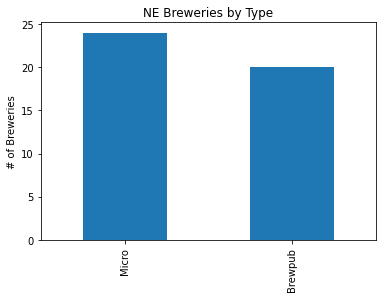

In [41]:
brewersDF['Type of Brewery'].value_counts().plot(kind='bar')

plt.title('NE Breweries by Type')
plt.ylabel('# of Breweries')
plt.show()

Not seeing an unusually lopsided range here. Looks okay.

In [42]:
type(brewersDF['5-digit Zip'][0])

str

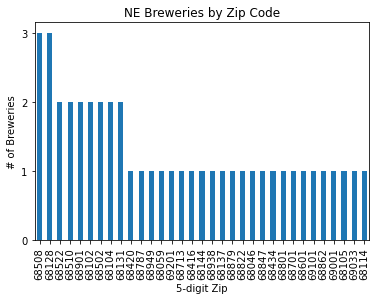

In [43]:
brewersDF['5-digit Zip'].value_counts().plot(kind='bar')

plt.title('NE Breweries by Zip Code')
plt.xlabel('5-digit Zip')
plt.ylabel('# of Breweries')
plt.yticks([0,1,2,3])
plt.show()

Nebraska zip codes range from 68001 to 69367. All of these appear to be within that range, so no outliers here.

In [44]:
# TO DO:  
# * DONE--Remove columns with datetime info from web scraping ('created_at', 'updated_at')
# * NA--~~Rename breweries (swap hyphens with spaces; Title Case; )~~ Nvm, id is different than name
# * DONE--All breweries are US, so 'country' column can be removed
#   * NOTE: Keeping state column because it is part of the address and may be helpful.
# * DONE--Add column for 5-digit zip
#   * Make column INT? Would this actually be useful?
#   * DONE--Maybe remove hyphen from 'postal_code' where there are only 5 digits?
#   * Maybe get the missing 9-digit postal codes? Useful?
# * DONE--"Remove duplicates"
# * DONE--Maybe fix phone #s (scientific notation)? float --> int
#   * DONE--Maybe reformat phone numbers? **"Format data into a more readable format"**
#     * https://stackoverflow.com/questions/51227601/python-format-phone-number/51227770
# * DONE--Brewery type, title case?
# * DONE--Rearrange columns
#   * DONE--Rename columns? **"Replace Headers"**
# * DONE--Make histograms to look for outliers -- add titles, labels
# * Maybe get missing lat-long from addresses? Would this be useful?

In [45]:
brewersDF

,Brewery ID,Brewery Name,Type of Brewery,Street Address,City,State,Postal Code,5-digit Zip,Website,Phone,Longitude,Latitude
0,backswing-brewing-co-lincoln,Backswing Brewing Co.,Micro,500 W South St Ste 8,Lincoln,Nebraska,68522-1744,68522,http://www.backswingbrewing.com,(402) 515-4263,NaN,NaN
2,benson-brewery-omaha,Benson Brewery,Brewpub,6059 Maple St,Omaha,Nebraska,68104-4050,68104,http://www.bensonbrewery.com,(402) 934-8668,-96.006345,41.284898
3,blue-blood-brewing-company-lincoln,Blue Blood Brewing Company,Brewpub,925 Robbers Cave Rd,Lincoln,Nebraska,68502,68502,http://www.bluebloodbrewing.com,(402) 477-2337,-96.707014,40.779996
4,boiler-brewing-company-lincoln,Boiler Brewing Company,Micro,129 N 10th St Ste 8,Lincoln,Nebraska,68508-3633,68508,http://www.boilerbrewingcompany.com,(402) 261-8775,NaN,NaN
5,bolo-beer-co-valentine,Bolo Beer Co,Micro,420 E 1st St,Valentine,Nebraska,69201-1904,69201,http://www.bolobeer.com,(402) 259-5180,-100.545728,42.872047
6,bootleg-brewers-sandhills-brewing-company-taylor,Bootleg Brewers - Sandhills Brewing Company,Brewpub,45145 829th Rd,Taylor,Nebraska,68879-8120,68879,http://www.bootlegbrewers.com,(308) 942-3440,NaN,NaN
7,bottle-rocket-brewing-co-seward,Bottle Rocket Brewing Co,Micro,230 S 5th St,Seward,Nebraska,68434-2520,68434,http://www.bottlerocketbrewing.com,(402) 304-5673,-97.097776,40.906296
9,brickway-brewery-and-distillery-omaha,Brickway Brewery and Distillery,Micro,1116 Jackson St,Omaha,Nebraska,68102-2825,68102,http://www.drinkbrickway.com,(402) 933-2613,-95.930905,41.254491
10,brush-creek-brewing-company-atkinson,Brush Creek Brewing Company,Brewpub,102 N Main St,Atkinson,Nebraska,68713-4946,68713,NaN,(402) 925-2629,-98.978367,42.531415
11,code-beer-co-lincoln,Code Beer Co.,Micro,200 S Antelope Valley Pkwy,Lincoln,Nebraska,68510-1016,68510,http://www.codebeer.co,(402) 318-5888,-96.693444,40.812308


In [46]:
brewersDF.to_csv('nebraskaCleaned.csv')